In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import r2_score,accuracy_score,precision_score,recall_score,f1_score 
from sklearn.model_selection import train_test_split

In [2]:
# Importing the data
df = pd.read_csv("/Users/seelamakhil/PERSONAL/devtown_project/creditcard.csv") 

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Data Analysis
df.shape
df.info()
df.describe()
df.corr()
plt.figure(figsize=(40,40)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

<Axes: >

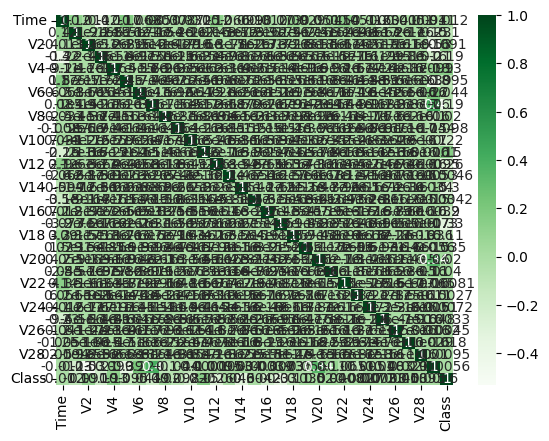

In [5]:
sns.heatmap(df.corr(),annot=True,cmap="Greens")

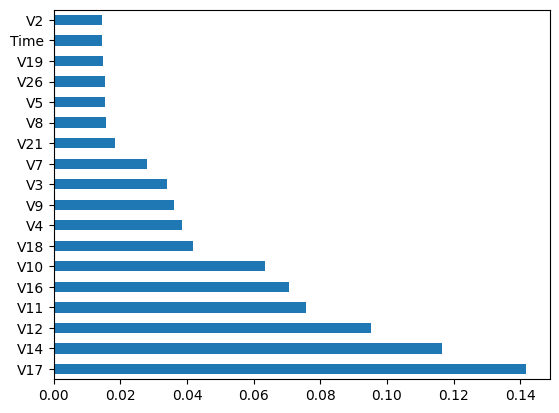

In [6]:
# Feature Selection
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
model = ExtraTreesClassifier()
model.fit(X,y)
model.feature_importances_
feat = pd.Series(model.feature_importances_,index=X.columns) 
feat.nlargest(18).plot(kind="barh")
plots = feat.nlargest(18) 
j=plots.index

In [7]:
X_new = X[j]
X_new.head(1)
X.shape
X_new.shape

(284807, 18)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2)

In [9]:
# Model Selection
randomf = RandomForestClassifier()

In [10]:
# Fitting the model
randomf.fit(X_train,y_train)

RandomForestClassifier()

In [11]:
y_pred = randomf.predict(X_test)
target = pd.DataFrame({"Actual":y_test,"Predicted":y_pred}) 
target

,Actual,Predicted
195782,0,0
235552,0,0
95283,0,0
254905,0,0
265311,0,0
...,...,...
248456,0,0
3023,0,0
192209,0,0
152505,0,0


In [12]:
# Model Score 
accuracy_score(y_pred,y_test)

0.9996839998595555